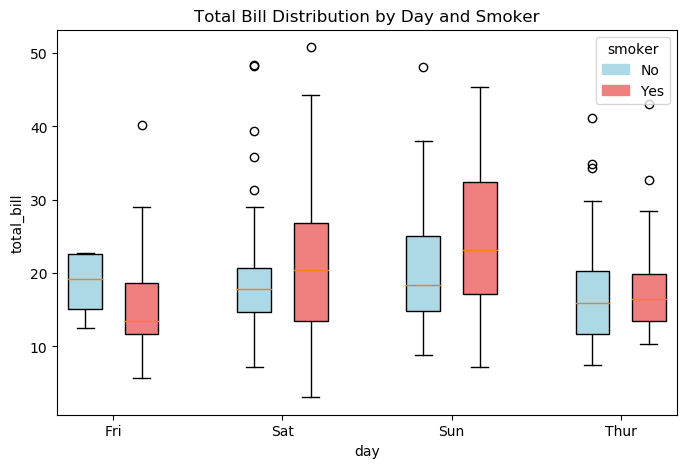

In [6]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 박스 플롯 hue 구현 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
tips = sns.load_dataset('tips')

# 데이터 준비
days = tips['day'].unique()
smokers = tips['smoker'].unique()

plt.figure(figsize=(8, 5))

# 각 day와 smoker 그룹별로 박스플롯 그리기
positions = []
data_to_plot = []
pos = 1

for day in sorted(days):  # day 순서대로
    for smoker in sorted(smokers):  # smoker = No, Yes
        group = tips[(tips['day'] == day) & (tips['smoker'] == smoker)]['total_bill']
        data_to_plot.append(group)
        positions.append(pos)
        pos += 1
    pos += 1  # day 사이 간격

# 박스플롯 그리기
bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)

# 색상 채우기 (smoker 구분)
colors = ['lightblue', 'lightcoral'] * len(days)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x축 레이블: day 가운데 배치
xticks = []
xlabels = []
for i, day in enumerate(sorted(days)):
    xticks.append((i* (len(smokers)+1)) + 1.5)  # day 그룹의 중앙
    xlabels.append(day)

plt.xticks(xticks, xlabels)
plt.xlabel("day")
plt.ylabel("total_bill")
plt.title('Total Bill Distribution by Day and Smoker')

# 범례 추가
from matplotlib.patches import Patch
legend_handles = [Patch(color='lightblue', label='No'),
                  Patch(color='lightcoral', label='Yes')]
plt.legend(handles=legend_handles, title="smoker")

plt.show()

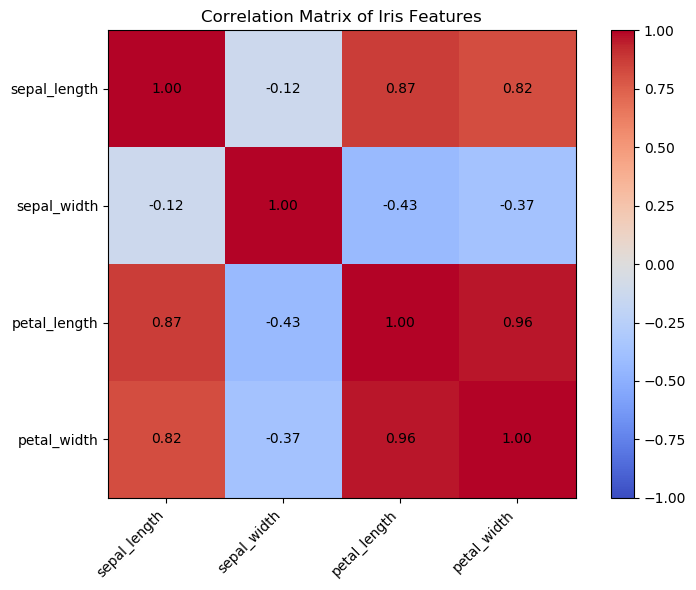

In [7]:
# 1.3. 데이터 시각화 - 주요 차트 내용 중 heatmap 예제 코드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seaborn 내장 데이터셋 로드
iris = sns.load_dataset('iris')

# 수치형 변수 간 상관계수 계산
corr = iris.corr()

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# imshow로 색상 맵 시각화
cax = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름으로 x, y축 라벨 설정
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# 각 셀에 상관계수 값 표시
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black')

# 컬러바 추가
fig.colorbar(cax)

plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import importlib

packages = [
    "numpy",
    "pandas",
    "scipy",
    "statsmodels",
    "sklearn",
    "matplotlib",
    "seaborn",
    "pingouin",
    "torch",
    "torchvision",
    "keras",
    "tensorflow",
    "pulp",
    "lightgbm",
    "plotly",
    "xgboost",
    "graphviz",
    "gensim"
]

for pkg in packages:
    try:
        module = importlib.import_module(pkg)
        # 대부분의 라이브러리는 __version__ 속성 사용
        version = getattr(module, "__version__", None)

        # 특이 케이스 처
        if version is None:
            if pkg == "keras":
                import keras
                version = keras.__version__
            elif pkg == "tensorflow":
                import tensorflow as tf
                version = tf.__version__
            else:
                version = "버전 정보 없음"

        print(f"{pkg:12s} : {version}")

    except Exception as e:
        print(f"{pkg:12s} : 설치 안됨 ({e})")


numpy        : 1.21.6
pandas       : 1.1.2
scipy        : 1.7.3
statsmodels  : 0.13.2
sklearn      : 0.23.2
matplotlib   : 3.0.3
seaborn      : 0.9.0
pingouin     : 설치 안됨 (cannot import name 'find_stack_level' from 'pandas.util._exceptions' (c:\users\busie\desktop\adp-study\.venv\lib\site-packages\pandas\util\_exceptions.py))
torch        : 1.13.1+cpu
torchvision  : 0.2.2
keras        : 2.2.4
tensorflow   : 1.13.1
pulp         : 2.5.0
lightgbm     : 2.2.3
plotly       : 3.7.1
xgboost      : 0.90
graphviz     : 0.10.1
gensim       : 3.7.2
